<a href="https://colab.research.google.com/github/WilliamQin65/cap-comp215/blob/main/Take_Home_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Purpose**

The purpose of this notebook is to help understand what does the Watts-Strogatz model look like, which is a model to generate small-world networks. We will also run the experiment this mathematical model by using Python, and then generate small-world networks with varying parameters.

Author: William Qin

Date: 2023-04-18

**Story**

In 1998 Duncan Watts and Steven Strogatz published a paper in Nature, “Collective dynamics of ‘small-world’ networks”, that proposed an explanation for the small world phenomenon.

Their goal was to create a generative model of a social network. A generative model tries to explain a phenomenon by modeling the process that builds or leads to the phenomenon. Watts and Strogatz proposed this process for building small-world graphs:

1.Start with a regular graph with nodes and each node connected to neighbors.

2.Choose a subset of the edges and “rewire” them by replacing them with random edges.

They consider two properties of these graphs, clustering and path length:

*   **Clustering** is a measure of the “cliquishness” of the graph. In a graph, a clique is a subset of nodes that are all connected to each other; in a social network, a clique is a set of people who are all friends with each other. Watts and Strogatz defined a clustering coefficient that quantifies the likelihood that two nodes that are connected to the same node are also connected to each other.
*   **Path length** is a measure of the average distance between two nodes, which corresponds to the degrees of separation in a social network.



**The Scientifc Idea**

We need social networks to connect people around the world. We use several social media platforms and communicate with each other. This experiment can help us know gow does social network evolve. It begins with the rings of nodes, each of the nodes connects to the nearest neighbours.

In [15]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

class WattsStrogatz:
    """
    A class representing the Watts-Strogatz experiment, a generative model of social networks.
    """
    def __init__(self, N, k, p):
        """
        Initializes the class with a ring of N nodes, each connected to its k nearest neighbors, and a rewiring probability of p.
        """
        self.N = N
        self.k = k
        self.p = p
        self.G = nx.watts_strogatz_graph(N, k, p)
    
    def reconnect(self):
        """
        Rewires each edge with probability p.
        """
        self.G = nx.watts_strogatz_graph(self.N, self.k, self.p)
        
    def plot_network(self):
        """
        Plots the current state of the network.
        """
        plt.figure(figsize=(8, 6))
        pos = nx.spring_layout(self.G)
        nx.draw(self.G, pos=pos, node_size=50)
        plt.title(f"Watts-Strogatz Network (N={self.N}, k={self.k}, p={self.p})")
        plt.show()
    
    def degree_distribution(self):
        """
        Computes the degree distribution of the network.
        """
        degrees = np.array(list(dict(self.G.degree()).values()))
        hist, bins = np.histogram(degrees, bins=np.arange(min(degrees), max(degrees)+2))
        return hist
    
    def clustering_coefficient(self):
        """
        Computes the clustering coefficient of the network.
        """
        return nx.average_clustering(self.G)

**Computational Experiment**

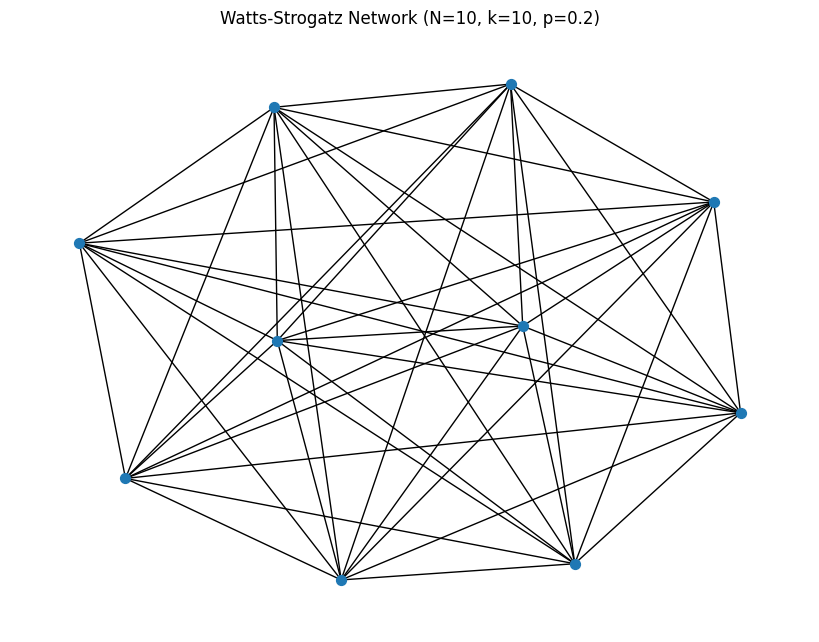

Clustering Coefficient: 1.0


In [19]:
# Set the parameters of the Watts-Strogatz model
N = 10
k = 10
p = 0.2

# Create an instance of the WattsStrogatz class
ws = WattsStrogatz(N, k, p)

# Plot the network
ws.plot_network()

# Compute and print the clustering coefficient
clustering_coefficient = ws.clustering_coefficient()
print(f"Clustering Coefficient: {clustering_coefficient}")